In [16]:
from examples import utils

import anndata
import numpy as np
import pandas as pd
import scipy.sparse as sp
import string

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

# Pancreas

In [21]:
adata = anndata.read_h5ad("embedding_tsne_3000_genes.h5ad")
new = anndata.read_h5ad("transform_tsne_1000_genes.h5ad")

In [22]:
colors = {
    'Beta cells': '#1f77b4',
    'Alpha cells': '#ff7f0e',
    'Delta cells': '#2ca02c',
    'PP cells': '#d62728',
    'Epsilon cells': '#9467bd',
    
    'Ductal cells': '#8c564b',
    'Acinar cells': '#e377c2',
    'PaSC': '#bcbd22',
    
    'Endothelial cell': '#17becf',
    'Macrophage': "#7f7f7f",
    "Mast cell": "#7f7f7f",
    "Schwann cell": "#7f7f7f",
    "T cell": "#7f7f7f",
    "Other": "#7f7f7f",
}

In [24]:
knn = KNeighborsClassifier()
knn.fit(adata.obsm["tsne"], adata.obs["labels"].values.astype(str))
print("Using correlation", accuracy_score(knn.predict(new.obsm["tsne"]), new.obs["labels"].values.astype(str)))
print("Using cosine", accuracy_score(knn.predict(new.obsm["tsne_cosine"]), new.obs["labels"].values.astype(str)))

Using correlation 0.9946380697050938
Using cosine 0.9946380697050938


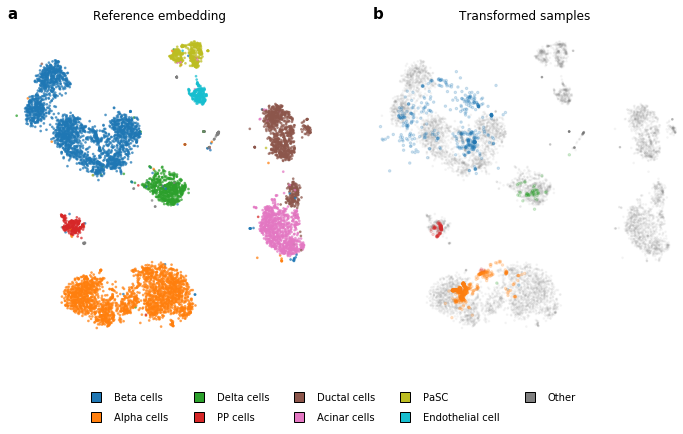

In [25]:
cell_order = list(colors.keys())
num_cell_types = len(np.unique(adata.obs["labels"]))

fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

utils.plot(adata.obsm["tsne"], adata.obs["labels"], ax=ax[0], title="Reference embedding", colors=colors, s=3, label_order=cell_order,
          legend_kwargs=dict(loc="upper center", bbox_to_anchor=(0.5, 0.05), bbox_transform=fig.transFigure, labelspacing=1, ncol=num_cell_types // 2 + 1))

colors_bw = {1: "#666666"}
utils.plot(adata.obsm["tsne"], np.ones_like(adata.obs["labels"]), ax=ax[1], colors=colors_bw, alpha=0.05, s=3, draw_legend=False)
utils.plot(new.obsm["tsne_cosine"], new.obs["labels"], ax=ax[1], colors=colors, draw_legend=False, s=6, label_order=cell_order, alpha=0.2)
ax[1].set_title("Transformed samples")


for ax_ in ax.ravel(): ax_.axis("equal")
    
coord_range = -38, 38
for ax_ in ax.ravel():
    ax_.set_xlim(*coord_range), ax_.set_ylim(*coord_range)

for ax_, letter in zip(ax, string.ascii_lowercase): 
    plt.text(0, 1.02, letter, transform=ax_.transAxes, fontsize=15, fontweight="bold")

plt.savefig("transform_pancreas.pdf", dpi=600, bbox_inches="tight", transparent=True)

# Brain

In [26]:
adata = anndata.read_h5ad("hrvatin_embedding_tsne_3000_genes.h5ad")
new = anndata.read_h5ad("hrvatin_transform_tsne_1000_genes.h5ad")

In [29]:
knn = KNeighborsClassifier()
knn.fit(adata.obsm["tsne"], adata.obs["labels"].values.astype(str))
print("Using correlation", accuracy_score(knn.predict(new.obsm["tsne"]), new.obs["labels"].values.astype(str)))
print("Using cosine", accuracy_score(knn.predict(new.obsm["tsne_cosine"]), new.obs["labels"].values.astype(str)))

Using correlation 0.9533395272014039
Using cosine 0.9534427583359141


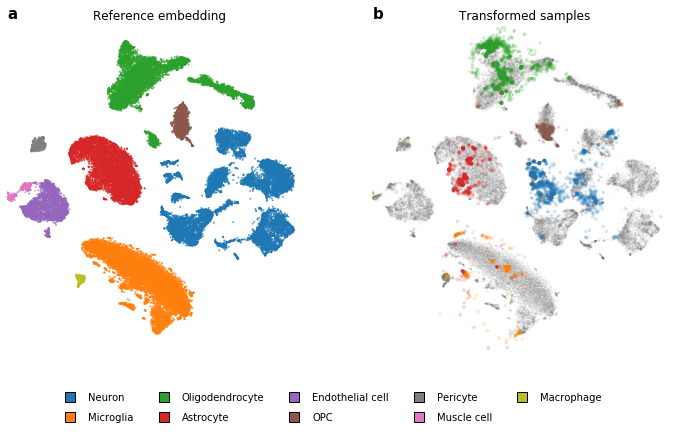

In [30]:
cell_order = list(colors.keys())
num_cell_types = len(np.unique(adata.obs["labels"]))

fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

utils.plot(adata.obsm["tsne"], adata.obs["labels"], ax=ax[0], title="Reference embedding", colors=colors, s=1, label_order=cell_order,
          legend_kwargs=dict(loc="upper center", bbox_to_anchor=(0.5, 0.05), bbox_transform=fig.transFigure, labelspacing=1, ncol=num_cell_types // 2 + 1))

colors_bw = {1: "#666666"}
utils.plot(adata.obsm["tsne"], np.ones_like(adata.obs["labels"]), ax=ax[1], colors=colors_bw, alpha=0.05, s=1, draw_legend=False)
utils.plot(new.obsm["tsne_cosine"], new.obs["labels"], ax=ax[1], colors=colors, draw_legend=False, s=6, label_order=cell_order, alpha=0.15)
ax[1].set_title("Transformed samples")

for ax_ in ax.ravel(): ax_.axis("equal")

coord_range = -50, 50
for ax_ in ax.ravel():
    ax_.set_xlim(*coord_range), ax_.set_ylim(*coord_range)

for ax_, letter in zip(ax, string.ascii_lowercase): 
    plt.text(0, 1.02, letter, transform=ax_.transAxes, fontsize=15, fontweight="bold")

plt.savefig("transform_brain.pdf", dpi=600, bbox_inches="tight", transparent=True)

# Retina

In [31]:
adata = anndata.read_h5ad("macosko_embedding_tsne_3000_genes.h5ad")
new = anndata.read_h5ad("macosko_transform_tsne_1000_genes.h5ad")

In [34]:
knn = KNeighborsClassifier()
knn.fit(adata.obsm["tsne"], adata.obs["labels"].values.astype(str))
print("Using correlation", accuracy_score(knn.predict(new.obsm["tsne"]), new.obs["labels"].values.astype(str)))
print("Using cosine", accuracy_score(knn.predict(new.obsm["tsne_cosine"]), new.obs["labels"].values.astype(str)))

Using correlation 0.9857622064852777
Using cosine 0.9864703689899367


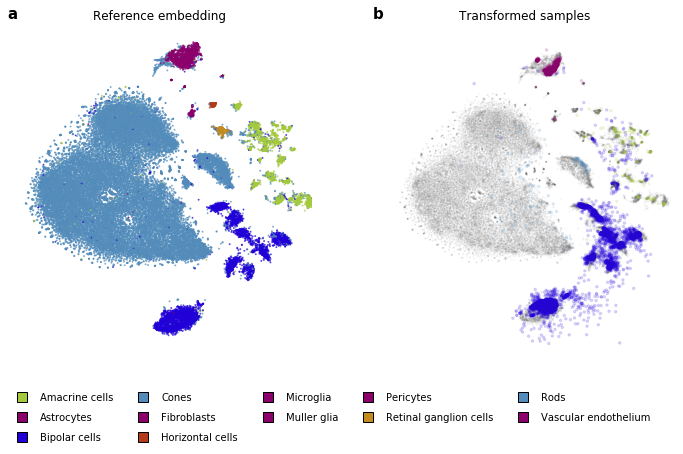

In [35]:
cell_order = list(colors.keys())
num_cell_types = len(np.unique(adata.obs["labels"]))

fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

utils.plot(adata.obsm["tsne"], adata.obs["labels"], ax=ax[0], title="Reference embedding", colors=colors, s=1, label_order=cell_order,
          legend_kwargs=dict(loc="upper center", bbox_to_anchor=(0.5, 0.05), bbox_transform=fig.transFigure, labelspacing=1, ncol=num_cell_types // 3 + 1))

colors_bw = {1: "#666666"}
utils.plot(adata.obsm["tsne"], np.ones_like(adata.obs["labels"]), ax=ax[1], colors=colors_bw, alpha=0.05, s=1, draw_legend=False)
utils.plot(new.obsm["tsne_cosine"], new.obs["labels"], ax=ax[1], colors=colors, draw_legend=False, s=6, label_order=cell_order, alpha=0.15)
ax[1].set_title("Transformed samples")

for ax_ in ax.ravel(): ax_.axis("equal")

coord_range = -50, 50
for ax_ in ax.ravel():
    ax_.set_xlim(*coord_range), ax_.set_ylim(*coord_range)

for ax_, letter in zip(ax, string.ascii_lowercase): 
    plt.text(0, 1.02, letter, transform=ax_.transAxes, fontsize=15, fontweight="bold")

plt.savefig("transform_retina.pdf", dpi=600, bbox_inches="tight", transparent=True)